link to dataset: https://www.kaggle.com/datasets/qizarafzaal/adult-dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/adult.csv'

Mounted at /content/drive


In [ ]:
#load the data set
data = pd.read_csv(file_path,header=None)

In [ ]:
data = data.select_dtypes(exclude=['int', 'float'])  # Drops integer and float columns
# Get the label of the 7th column
column_label = data.columns[6] # Python uses 0-based indexing

# Drop the 7th column
data.drop(column_label, axis=1, inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       32560 non-null  object
 1   3       32560 non-null  object
 2   5       32560 non-null  object
 3   6       32560 non-null  object
 4   7       32560 non-null  object
 5   8       32560 non-null  object
 6   13      32560 non-null  object
 7   14      32560 non-null  object
dtypes: object(8)
memory usage: 2.2+ MB


In [ ]:
#retrieve array
dataset=data.values
dataset

array([[' State-gov', ' Bachelors', ' Never-married', ..., ' White',
        ' United-States', ' <=50K'],
       [' Self-emp-not-inc', ' Bachelors', ' Married-civ-spouse', ...,
        ' White', ' United-States', ' <=50K'],
       [' Private', ' HS-grad', ' Divorced', ..., ' White',
        ' United-States', ' <=50K'],
       ...,
       [' Private', ' HS-grad', ' Widowed', ..., ' White',
        ' United-States', ' <=50K'],
       [' Private', ' HS-grad', ' Never-married', ..., ' White',
        ' United-States', ' <=50K'],
       [' Self-emp-inc', ' HS-grad', ' Married-civ-spouse', ...,
        ' White', ' United-States', ' >50K']], dtype=object)

In [ ]:
#split into input and output variables
X=dataset[:,:-1]
Y=dataset[:,-1]

In [ ]:
#format all fields as strings
X=X.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split the data set into train and test set
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.33, random_state=1)
#print the shape
print("Train", X_train.shape,Y_train.shape)
print("Test",X_test.shape, Y_test.shape)

Train (21815, 7) (21815,)
Test (10745, 7) (10745,)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
#prepare the input variables
def prepare_inputs(X_train, X_test):
    oe=OrdinalEncoder()
    oe.fit(X_train)  #first fit the encoding on the training data set
    X_train_enc=oe.transform(X_train)  #then apply it to the train set
    X_test_enc=oe.transform(X_test)   #apply it to the test set
    return X_train_enc, X_test_enc

In [ ]:
#prepare target variable
def prepare_target(Y_train, Y_test):
    le=LabelEncoder()
    le.fit(Y_train)
    Y_train_enc=le.transform(Y_train)
    Y_test_enc=le.transform(Y_test)
    return Y_train_enc, Y_test_enc

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you have X_train and X_test
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)


In [ ]:
#calling the functions
X_train_enc,X_test_enc=prepare_inputs(X_train,X_test)
Y_train_enc,Y_test_enc=prepare_target(Y_train,Y_test)

In [ ]:
#shape after encoding
print('Train',X_train_enc.shape, Y_train_enc.shape)
print('Test',X_test_enc.shape, Y_test_enc.shape)

Train (21815, 7) (21815,)
Test (10745, 7) (10745,)


## Chi-squared Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
def select_features(X_train, Y_train, X_test):
    fs=SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, Y_train)
    X_train_fs=fs.transform(X_train)
    X_test_fs=fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [ ]:
#calling feature selection function
X_train_fs, X_test_fs, fs=select_features(X_train_enc, Y_train_enc, X_test_enc)

In [ ]:
#print the scores
fs.scores_

array([  38.95422874,  197.23839592,  777.30188448,  321.08826425,
       2464.78068367,   21.28857713,    8.24319861])

In [ ]:
import matplotlib.pyplot as plt

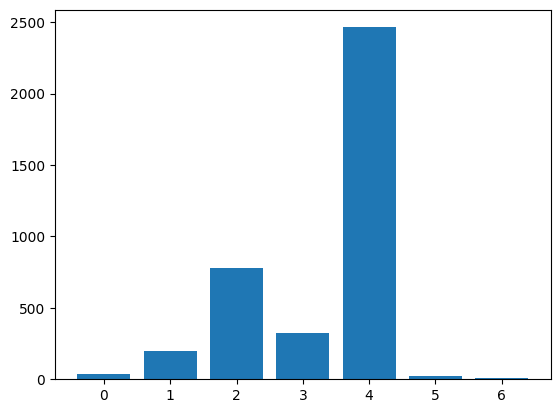

In [ ]:
#plot the scores
plt.bar([i for i in range (len(fs.scores_))],fs.scores_)
plt.show()

From the bar chart, it is inferred that the features 3, 4, 5 and 8 are the most relevant features

## Mutual Information feature selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
def select_features_2(X_train, Y_train, X_test):
    fs=SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, Y_train)
    X_train_fs_2=fs.transform(X_train)
    X_test_fs_2=fs.transform(X_test)
    return X_train_fs_2, X_test_fs_2, fs


In [ ]:
#calling feature selection function
X_train_fs_2, X_test_fs_2, fs=select_features_2(X_train_enc, Y_train_enc, X_test_enc)

In [ ]:
#print the scores
fs.scores_

array([0.01767937, 0.06832453, 0.11327649, 0.06363992, 0.11589389,
       0.00696779, 0.0116338 ])

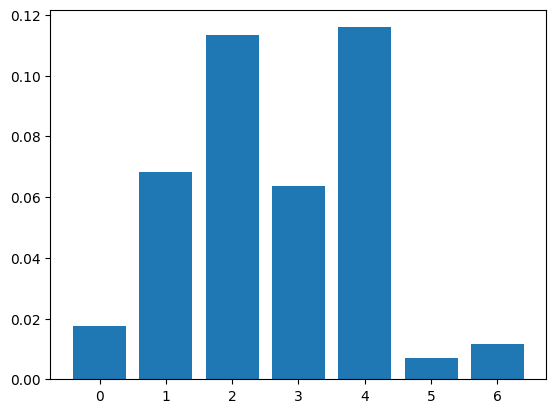

In [ ]:
#plot the scores
plt.bar([i for i in range (len(fs.scores_))],fs.scores_)
plt.show()

It is inferred from the bar chart that the features 0, 2,5 and 8 are relevant features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Model built using ALL features

In [ ]:
#fit the model
model=LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, Y_train_enc)


LogisticRegression()

In [ ]:
#predict the model
yhat=model.predict(X_test_enc)

In [ ]:
#Evaluate the prediction
accuracy=accuracy_score(Y_test_enc, yhat)
print("Accuracy: %.2f" %(accuracy*100))

Accuracy: 76.36


## Model built using Chi-squared features

In [ ]:
model1=LogisticRegression(solver='lbfgs')
#fit the model
model1.fit(X_train_fs, Y_train_enc)
#evaluate the model
yhat=model1.predict(X_test_fs)
#evaluate the performance
accuracy=accuracy_score(Y_test_enc,yhat)
print("Accuracy: %.2f" %(accuracy*100))

Accuracy: 76.36


## Model built using Mutual Information


In [ ]:
model2=LogisticRegression(solver='lbfgs')
#fit the model
model2.fit(X_train_fs_2, Y_train_enc)
#evaluate the model
yhat=model2.predict(X_test_fs_2)
#evaluate the performance
accuracy=accuracy_score(Y_test_enc,yhat)
print("Accuracy: %.2f" %(accuracy*100))

Accuracy: 76.36


## Conclusion
Models built with all features, chi-square based feature selection or with mutual information based feature selection have the same accuracy percentage.